## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparations

In [3]:
train = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/train_df.csv", engine = 'python')

In [4]:
train.shape

(1594673, 69)

* train data 에 대해서만 EDA 
* acc_id, char_id, class 를 groupby 한 데이터 준비

In [4]:
data = train.groupby(['acc_id','char_id','class']).agg('mean').reset_index()

In [5]:
data.shape

(149851, 68)

In [6]:
data = data.drop(['Unnamed: 0','day'], axis=1)

In [8]:
data.head()

,acc_id,char_id,class,survival_time,label_amount_spent,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,combat_play_time,non_combat_play_time,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,2,233598,1.0,64.0,0.00000,3.310212,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,5,22260,2.0,60.0,0.00000,0.009480,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000533,4.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,5,175813,2.0,60.0,0.00000,0.003950,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000579,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,5,321231,2.0,60.0,0.00000,0.613387,0.323104,0.215103,0.069384,0.011082,...,0.509761,0.000000,15.0,0.0,0.0,0.0,0.047973,0.0,0.0,0.009813
4,8,43437,5.0,64.0,0.02031,0.050513,0.016721,0.019369,0.000000,0.003463,...,1.029651,0.000000,15.0,0.0,0.0,0.0,0.059966,0.0,0.0,0.012266


In [9]:
# 이탈/비이탈 과금/무과금에 대한 binary 데이터 추가

data['survived'] = data['survival_time'].apply(lambda x : 1 if x==64 else 0) 
data['spent'] = data['label_amount_spent'].apply(lambda x : 0 if x==0 else 1)

In [11]:
data = data.fillna(0)

## 0. 시각화 함수 구현

In [17]:
## 시각화 함수 따로 구현.
def drawtable_survived_binary(df,variable,n):
    df['chatBand'] = df[variable]
    df['chatBand'] = pd.qcut(df[variable],n,duplicates='drop')
    gr = df.groupby(['chatBand','survived']).size()
    a = gr / gr.groupby(level=0).sum()
    bb = df['chatBand'].unique().sort_values()
    list1=[]
    list2=[]

    for i in range(2*n):
        if i%2 == 0:
            list1.append(pd.DataFrame(a).reset_index()[0][i])
        if i%2 == 1:
            list2.append(pd.DataFrame(a).reset_index()[0][i])


    pos = list(range(n))
    width=0.2

    flg,ax = plt.subplots(figsize=(15,5))

    plt.bar(pos,
          list2,
          width,
          alpha=0.5,
          color='#F78F1E')
    plt.bar([p+width for p in pos],
          list1,
          width,
          alpha=0.5,
          color='#EE3224')


    ax.set_ylabel('percentage')
    ax.set_title(variable)
    ax.set_xticks([p+1.5*width for p in pos])
    ax.set_xticklabels(bb)
    plt.xlim(min(pos)-width,max(pos)+width*4)
    plt.ylim([0,max(list1+list2)])
    plt.xticks(rotation=45)
    plt.legend(['survived','not survived'],loc='upper right')
    plt.grid()
    plt.show()    

In [20]:
## 시각화 함수 따로 구현.
def drawtable_spent_binary(df,variable,n):
    df['chatBand2'] = df[variable]
    df['chatBand2'] = pd.qcut(df[variable],n,duplicates='drop')
    gr = df.groupby(['chatBand2','spent']).size()
    a = gr / gr.groupby(level=0).sum()
    bb = df['chatBand2'].unique().sort_values()
    list1=[]
    list2=[]

    for i in range(2*n):
        if i%2 == 0:
            list1.append(pd.DataFrame(a).reset_index()[0][i])
        if i%2 == 1:
            list2.append(pd.DataFrame(a).reset_index()[0][i])


    pos = list(range(n))
    width=0.2

    flg,ax = plt.subplots(figsize=(15,5))

    plt.bar(pos,
          list2,
          width,
          alpha=0.5,
          color='#F78F1E')
    plt.bar([p+width for p in pos],
          list1,
          width,
          alpha=0.5,
          color='#EE3224')


    ax.set_ylabel('percentage')
    ax.set_title(variable)
    ax.set_xticks([p+1.5*width for p in pos])
    ax.set_xticklabels(bb)
    plt.xlim(min(pos)-width,max(pos)+width*4)
    plt.ylim([0,max(list1+list2)])
    plt.xticks(rotation=45)
    plt.legend(['spent','not spent'],loc='upper right')
    plt.grid()
    plt.show()    

## 1. 캐릭터 수와 잔존율/과금 비례관계 확인

In [13]:
# 캐릭터 수와 잔존율 비례?
# user id 별 보유한 캐릭터 수 구하고 열 추가

data['id_cnt'] = 0
id_data = data.groupby('acc_id')['id_cnt'].agg('count').reset_index()
id_data.head()

,acc_id,id_cnt
0,2,1
1,5,3
2,8,7
3,17,4
4,20,2


In [14]:
new_df = data.drop_duplicates('acc_id')   
new_df = new_df[['acc_id','survived','spent']]

In [15]:
new_df = pd.merge(id_data,new_df,on='acc_id')

In [16]:
new_df.shape

(40000, 4)

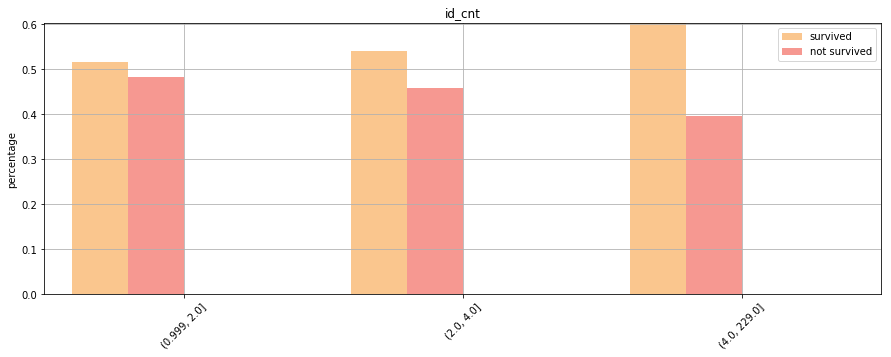

In [19]:
drawtable_survived_binary(new_df, 'id_cnt', 3)

# 캐릭터 개수가 높을 수록 잔존율이 높아짐 

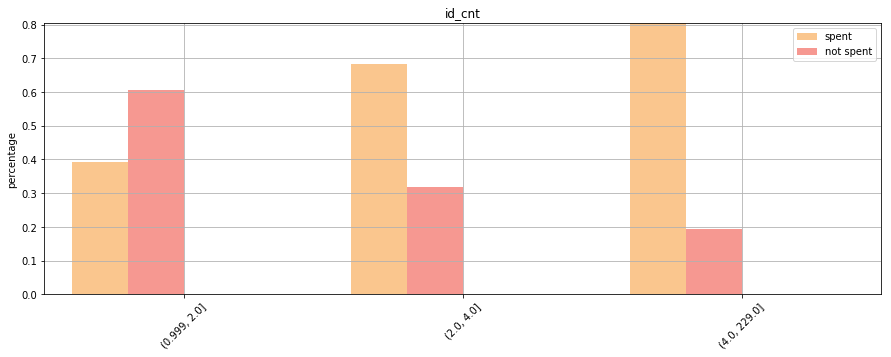

In [21]:
drawtable_spent_binary(new_df,'id_cnt',3)

* feature 함수

In [22]:
# 캐릭터 보유 개수에 따라 spent, survived 비율에 선형관계가 보임
# 캐릭터 보유 개수에 따른 범주형 변수를 피쳐로 넣자

# 전제 : id별 캐릭서 수를 나타내는 열이 존재해야 함
# x: id별 캐릭터 개수 
def idcnt(x):
    if x<=2 :
        return 0
    elif x<=4:
        return 1
    else :
        return 2   

## 2. class별 잔존율 차이

In [23]:
aa = data.groupby(['class'])['survived'].agg('sum').reset_index()
bb = data.groupby(['class'])['survived'].agg('count').reset_index()

cc = pd.merge(aa,bb,on='class')
cc['survived_0'] = cc['survived_y']-cc['survived_x']
cc = cc.rename(columns = {'survived_x':'survived_1', 'survived_y': 'survived_all'})

cc['rate_survived_1'] = cc['survived_1']/cc['survived_all']
cc['rate_survived_0'] = cc['survived_0']/cc['survived_all']

cc

,class,survived_1,survived_all,survived_0,rate_survived_1,rate_survived_0
0,0.0,9420,16137,6717,0.583752,0.416248
1,1.0,17903,28819,10916,0.621222,0.378778
2,2.0,15615,26774,11159,0.583215,0.416785
3,3.0,9869,18981,9112,0.519941,0.480059
4,4.0,8360,16292,7932,0.513135,0.486865
5,5.0,8091,15065,6974,0.537073,0.462927
6,6.0,2976,5514,2538,0.539717,0.460283
7,7.0,13722,22269,8547,0.616193,0.383807


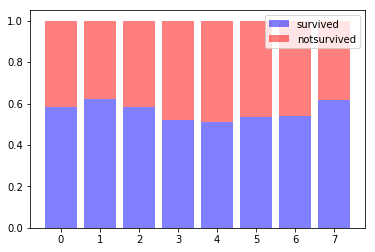

In [24]:
ypos = np.arange(8)

plt.bar(ypos, cc['rate_survived_1'], alpha=0.5,color='b')
plt.bar(ypos, cc['rate_survived_0'], bottom = cc['rate_survived_1'], alpha=0.5, color='r')

plt.xlabel = 'class'
plt.legend(['survived','notsurvived'], loc = 'upper right')

plt.show()

# 별 차이 없음

## 3. class별 과금 무과금 차이

In [26]:
mm = data.groupby('class')['spent'].agg('sum').reset_index()
mm2 = data.groupby('class')['spent'].agg('count').reset_index()
mm3 = pd.merge(mm,mm2,on='class')

mm3['spent_0'] = mm3['spent_y']-mm3['spent_x']
mm3 = mm3.rename(columns = {'spent_x':'spent_1', 'spent_y':'spent_all'})

mm3['rate_spent_1'] = mm3['spent_1']/mm3['spent_all']
mm3['rate_spent_0'] = mm3['spent_0']/mm3['spent_all']

mm3

,class,spent_1,spent_all,spent_0,rate_spent_1,rate_spent_0
0,0.0,11407,16137,4730,0.706885,0.293115
1,1.0,20804,28819,8015,0.721885,0.278115
2,2.0,20058,26774,6716,0.749160,0.250840
3,3.0,12854,18981,6127,0.677204,0.322796
4,4.0,10372,16292,5920,0.636631,0.363369
5,5.0,11450,15065,3615,0.760040,0.239960
6,6.0,4238,5514,1276,0.768589,0.231411
7,7.0,16266,22269,6003,0.730432,0.269568


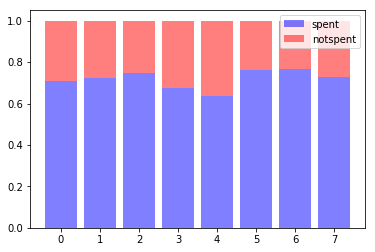

In [27]:
ypos = np.arange(8)

plt.bar(ypos, mm3['rate_spent_1'], alpha=0.5,color='b')
plt.bar(ypos, mm3['rate_spent_0'], bottom = mm3['rate_spent_1'], alpha=0.5, color='r')

plt.xlabel = 'class'
plt.legend(['spent','notspent'], loc = 'upper right')

plt.show()

# 별 차이 없음

## 4. level별 비이탈/과금 차이 확인

In [28]:
# data aggregate로 level이 평균 level로 구해졌기 때문에 반올림 처리

data['level'] = data['level'].apply(lambda x : round(x,0))

In [30]:
nn = data.groupby('level')['survived'].agg('sum')

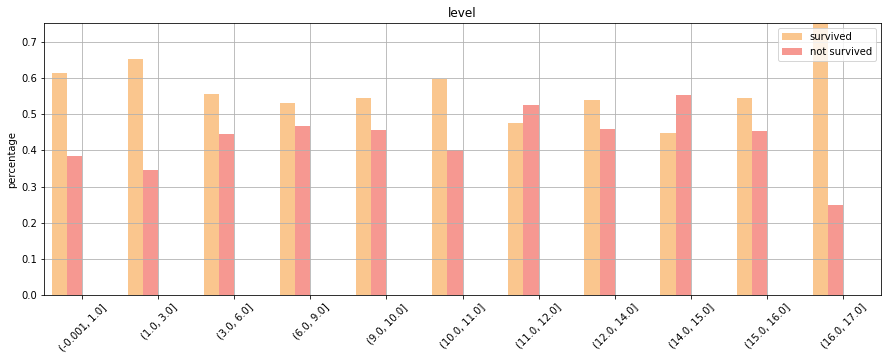

In [32]:
drawtable_survived_binary(data,'level',11)

# 레벨이 높아질수록 생존율이 높아지지는 않음 
# level이 아주 작거나 아주 높으면 생존율에 차이를 보임

* feature 함수

In [33]:
# level <=3 or >=16 이면 1 아니면 0

def bylevel(x):
    if x<=3 or x>=16:
        return 1
    else:
        return 0

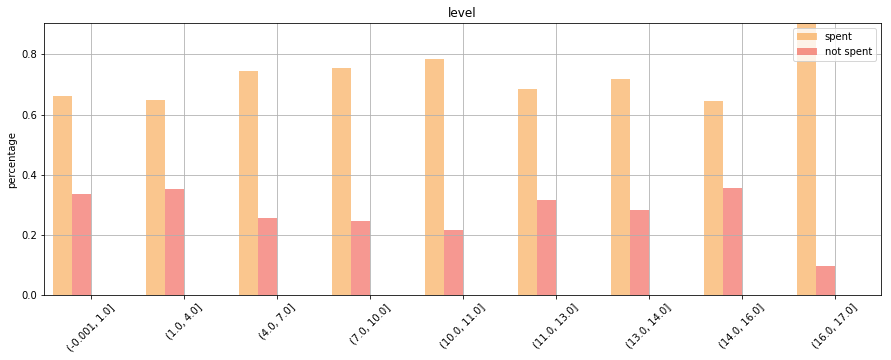

In [34]:
drawtable_spent_binary(data,'level',9)

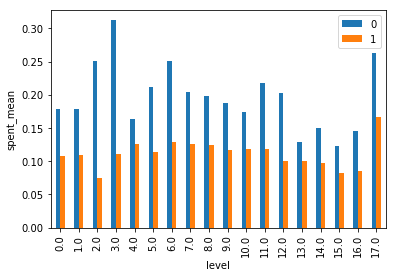

In [36]:
kk = data.groupby(['level','survived'])['label_amount_spent'].mean()
kk.unstack().plot.bar()
plt.ylabel('spent_mean')

plt.legend(loc='upper right')
plt.show()
